Calculate and plot taus per area using full signal of different length. ACFs with NaNs are removed as preprocessing.

In [58]:
import numpy as np
import pandas as pd
import pickle
import json
import matplotlib as mpl
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from calculate_tau import fit_single_exp, fit_single_exp_2d, func_single_exp_monkey
from cfg_global import project_folder_path
os.chdir(current_wd)

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
# True - calc and plot, False only plot
calc_taus = True
save_taus = False
save_fig = False

In [4]:
#min_to_keep = 20

dataset_folder = project_folder_path + 'results\\mice\\dataset\\'
fig_folder = project_folder_path + 'results\\mice\\fig_draft_paper\\'

### Load data (or calc)

In [5]:
#units_info_df = pd.read_pickle(dataset_folder + 'sua_list_constrained_units_df.pkl')

units_info_df = pd.read_pickle(dataset_folder + 'cut_30min\\lv_df.pkl')
units_info_df_subset = units_info_df[['unit_id', 'ecephys_structure_acronym', 'fr_hz_spont_30min', 'lv']].copy()
units_info_df_subset.head(2)

,unit_id,ecephys_structure_acronym,fr_hz_spont_30min,lv
0,950913540,VISam,6.038333,1.239003
1,950915005,VISam,4.030556,0.628989


In [14]:
if calc_taus:
    acf_full_df_file = dataset_folder + 'cut_30min\\binned\\acf_full_50ms_20lags_df.pkl'
    acf_full_df = pd.read_pickle(acf_full_df_file)
    acf_isttc_full_df_file = dataset_folder + 'cut_30min\\non_binned\\acf_isttc_full_50ms_20lags_df_25dt.pkl'
    acf_isttc_full_df = pd.read_pickle(acf_isttc_full_df_file)

In [6]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags+1)]
print('acf_cols {}'.format(acf_cols))

acf_cols ['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20']


In [9]:
def unit_taus(acf_full_df_file_):
    n_lags = 20
    acf_cols = ['acf_' + str(i) for i in range(n_lags+1)]
    print('acf_cols {}'.format(acf_cols))
    
    acf_full_df = pd.read_pickle(acf_full_df_file_)
    
    acf_full_2d = acf_full_df[acf_cols].values
    print(f'acf_2d shape {acf_full_2d.shape}')
    acf_full_unit_ids = acf_full_df['unit_id'].values
    print(f'acf_full_unit_ids shape {acf_full_unit_ids.shape}')
    
    acf_full_dict = {}
    for unit_id_idx, unit_id in enumerate(acf_full_unit_ids):
        if unit_id_idx % 1000 == 0:
            print(f'#####\nProcessing unit {unit_id}, {unit_id_idx+1}/{len(acf_full_unit_ids)}, {datetime.now()}')
        fit_popt, fit_pcov, tau, tau_ci, fit_r_squared, explained_var, log_message = fit_single_exp(acf_full_2d[unit_id_idx,:],
                                                                                  start_idx_=1, exp_fun_=func_single_exp_monkey)
        taus = {'tau':tau,
                'tau_lower':tau_ci[0],
                'tau_upper':tau_ci[1],
                'fit_r_squared': fit_r_squared,
                'explained_var': explained_var,
                'popt': fit_popt,
                'pcov': fit_pcov,
                'log_message': log_message}
        acf_full_dict[unit_id] = {'taus': taus,
                                  'acf': acf_full_2d[unit_id_idx,:]}
    return acf_full_dict

In [16]:
if calc_taus:
    acf_full_dict_30 = unit_taus(dataset_folder + 'cut_30min\\binned\\acf_full_50ms_20lags_df.pkl')

acf_cols ['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20']
acf_2d shape (5775, 21)
acf_full_unit_ids shape (5775,)
#####
Processing unit 950913540, 1/5775, 2025-06-28 14:14:40.621932
#####
Processing unit 950993240, 1001/5775, 2025-06-28 14:15:01.576050
#####
Processing unit 951013832, 2001/5775, 2025-06-28 14:15:20.035795
#####
Processing unit 951070553, 3001/5775, 2025-06-28 14:15:43.511933
#####
Processing unit 951148235, 4001/5775, 2025-06-28 14:15:56.613166
#####
Processing unit 951172317, 5001/5775, 2025-06-28 14:16:10.733537


In [17]:
if calc_taus:
    isttc_full_dict_30 = unit_taus(dataset_folder + 'cut_30min\\non_binned\\acf_isttc_full_50ms_20lags_df_25dt.pkl')

acf_cols ['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20']
acf_2d shape (5775, 21)
acf_full_unit_ids shape (5775,)
#####
Processing unit 950913540, 1/5775, 2025-06-28 14:19:53.647639
#####
Processing unit 950993240, 1001/5775, 2025-06-28 14:20:13.916154
#####
Processing unit 951013832, 2001/5775, 2025-06-28 14:20:34.598659
#####
Processing unit 951070553, 3001/5775, 2025-06-28 14:20:57.460934
#####
Processing unit 951148235, 4001/5775, 2025-06-28 14:21:10.096932
#####
Processing unit 951172317, 5001/5775, 2025-06-28 14:21:22.547670


In [10]:
area_taus_dict = {'acf_full_1': unit_taus(acf_full_df_file_ = dataset_folder + 'cut_1min\\acf_full_50ms_20lags_' + str(1) + 'min_df.pkl'), 
                  'isttc_full_1': unit_taus(acf_full_df_file_ = dataset_folder + 'cut_1min\\isttc_full_50ms_20lags_' + str(1) + 'min_df.pkl'),
                  'acf_full_5': unit_taus(acf_full_df_file_ = dataset_folder + 'cut_5min\\acf_full_50ms_20lags_' + str(5) + 'min_df.pkl'), 
                  'isttc_full_5': unit_taus(acf_full_df_file_ = dataset_folder + 'cut_5min\\isttc_full_50ms_20lags_' + str(5) + 'min_df.pkl'),
                  'acf_full_10': unit_taus(acf_full_df_file_ = dataset_folder + 'cut_10min\\acf_full_50ms_20lags_' + str(10) + 'min_df.pkl'), 
                  'isttc_full_10': unit_taus(acf_full_df_file_ = dataset_folder + 'cut_10min\\isttc_full_50ms_20lags_' + str(10) + 'min_df.pkl'),
                  'acf_full_20': unit_taus(acf_full_df_file_ = dataset_folder + 'cut_20min\\acf_full_50ms_20lags_' + str(20) + 'min_df.pkl'), 
                  'isttc_full_20': unit_taus(acf_full_df_file_ = dataset_folder + 'cut_20min\\isttc_full_50ms_20lags_' + str(20) + 'min_df.pkl'),}

acf_cols ['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20']
acf_2d shape (5775, 21)
acf_full_unit_ids shape (5775,)
#####
Processing unit 950913540, 1/5775, 2025-06-28 13:54:37.440910
ValueError: array must not contain infs or NaNs
Possible reason: acf contains NaNs, low spike count
ValueError: array must not contain infs or NaNs
Possible reason: acf contains NaNs, low spike count
ValueError: array must not contain infs or NaNs
Possible reason: acf contains NaNs, low spike count
ValueError: array must not contain infs or NaNs
Possible reason: acf contains NaNs, low spike count
ValueError: array must not contain infs or NaNs
Possible reason: acf contains NaNs, low spike count
ValueError: array must not contain infs or NaNs
Possible reason: acf contains NaNs, low spike count
ValueError: array must not contain infs or NaNs
Possible reason: a

In [11]:
def calculate_acf_decline_flag(acf_, start_idx=3, end_idx=5):
    acf_decay = np.all(np.diff(acf_[start_idx:end_idx]) <= 0)
    return acf_decay

def make_plot_df(acf_full_dict, method, length):
    data = []
    for unit_id, unit_data in acf_full_dict.items():
        taus = unit_data['taus']  
        data.append({
            'unit_id': unit_id,
            'tau': taus['tau'],
            # 'tau_lower': taus['tau_lower'],
            # 'tau_upper': taus['tau_upper'],
            'fit_r_squared': taus['fit_r_squared'],
            'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
        })
    acf_full_plot_df = pd.DataFrame(data)
    acf_full_plot_df['method'] = method
    acf_full_plot_df['length'] = length
    acf_full_plot_df['tau_ms'] = acf_full_plot_df['tau'] * 50
    acf_full_plot_df = acf_full_plot_df.merge(units_info_df_subset, on='unit_id', how='left')
    
    rows_with_nans_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
    n_rows_with_nan = len(rows_with_nans_df)
    print(f'N rows with NaNs {n_rows_with_nan}')

    return acf_full_plot_df

In [31]:
acf_30_plot = make_plot_df(acf_full_dict_30, 'acf_full', 30)
sttc_30_plot = make_plot_df(isttc_full_dict_30, 'sttc_full', 30)

acf_20_plot = make_plot_df(area_taus_dict['acf_full_20'], 'acf_full', 20)
sttc_20_plot = make_plot_df(area_taus_dict['isttc_full_20'], 'sttc_full', 20)

acf_10_plot = make_plot_df(area_taus_dict['acf_full_10'], 'acf_full', 10)
sttc_10_plot = make_plot_df(area_taus_dict['isttc_full_10'], 'sttc_full', 10)

acf_10_plot = make_plot_df(area_taus_dict['acf_full_10'], 'acf_full', 10)
sttc_10_plot = make_plot_df(area_taus_dict['isttc_full_10'], 'sttc_full', 10)

acf_5_plot = make_plot_df(area_taus_dict['acf_full_5'], 'acf_full', 5)
sttc_5_plot = make_plot_df(area_taus_dict['isttc_full_5'], 'sttc_full', 5)

acf_1_plot = make_plot_df(area_taus_dict['acf_full_1'], 'acf_full', 1)
sttc_1_plot = make_plot_df(area_taus_dict['isttc_full_1'], 'sttc_full', 1)

N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 0
N rows with NaNs 101
N rows with NaNs 0


In [32]:
acf_1_plot['tau_diff_rel'] = np.abs(acf_1_plot['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
acf_1_plot['tau_diff_rel_log10'] = np.log10(acf_1_plot['tau_diff_rel'])

acf_5_plot['tau_diff_rel'] = np.abs(acf_5_plot['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
acf_5_plot['tau_diff_rel_log10'] = np.log10(acf_5_plot['tau_diff_rel'])

acf_10_plot['tau_diff_rel'] = np.abs(acf_10_plot['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
acf_10_plot['tau_diff_rel_log10'] = np.log10(acf_10_plot['tau_diff_rel'])

acf_20_plot['tau_diff_rel'] = np.abs(acf_20_plot['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
acf_20_plot['tau_diff_rel_log10'] = np.log10(acf_20_plot['tau_diff_rel'])

acf_30_plot['tau_diff_rel'] = np.abs(acf_30_plot['tau_ms'] - acf_30_plot['tau_ms']) / acf_30_plot['tau_ms'] * 100
acf_30_plot['tau_diff_rel_log10'] = np.log10(acf_30_plot['tau_diff_rel'])

C:\Users\ipoch\anaconda3\envs\isttc_new\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
sttc_1_plot['tau_diff_rel'] = np.abs(sttc_1_plot['tau_ms'] - sttc_30_plot['tau_ms']) / sttc_30_plot['tau_ms'] * 100
sttc_1_plot['tau_diff_rel_log10'] = np.log10(sttc_1_plot['tau_diff_rel'])

sttc_5_plot['tau_diff_rel'] = np.abs(sttc_5_plot['tau_ms'] - sttc_30_plot['tau_ms']) / sttc_30_plot['tau_ms'] * 100
sttc_5_plot['tau_diff_rel_log10'] = np.log10(sttc_5_plot['tau_diff_rel'])

sttc_10_plot['tau_diff_rel'] = np.abs(sttc_10_plot['tau_ms'] - sttc_30_plot['tau_ms']) / sttc_30_plot['tau_ms'] * 100
sttc_10_plot['tau_diff_rel_log10'] = np.log10(sttc_10_plot['tau_diff_rel'])

sttc_20_plot['tau_diff_rel'] = np.abs(sttc_20_plot['tau_ms'] - sttc_30_plot['tau_ms']) / sttc_30_plot['tau_ms'] * 100
sttc_20_plot['tau_diff_rel_log10'] = np.log10(sttc_20_plot['tau_diff_rel'])

sttc_30_plot['tau_diff_rel'] = np.abs(sttc_30_plot['tau_ms'] - sttc_30_plot['tau_ms']) / sttc_30_plot['tau_ms'] * 100
sttc_30_plot['tau_diff_rel_log10'] = np.log10(sttc_30_plot['tau_diff_rel'])

C:\Users\ipoch\anaconda3\envs\isttc_new\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
def remove_nans(pearson_df_, sttc_df_):
    # check for NaNs 
    
    rows_with_nans_acf_df = pearson_df_[pearson_df_.isna().any(axis=1)]
    n_rows_with_nan_acf = len(rows_with_nans_acf_df)
    print(f'N rows with NaNs {n_rows_with_nan_acf}')
    
    rows_with_nans_isttc_df = sttc_df_[sttc_df_.isna().any(axis=1)]
    n_rows_with_nan_isttc = len(rows_with_nans_isttc_df)
    print(f'N rows with NaNs {n_rows_with_nan_isttc}')
    
    # take from isttc dataset only rows where acf df has no NaNs
    sttc_df = sttc_df_[~sttc_df_['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
    #sttc_df = sttc_df_
    pearson_df = pearson_df_[~pearson_df_['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
    
    print(f'len acf_full_plot_df {len(pearson_df)}, len isttc_acf_df {len(sttc_df)}')

    return pearson_df, sttc_df

In [21]:
acf_1_plot,sttc_1_plot =  remove_nans(acf_1_plot, sttc_1_plot) 

N rows with NaNs 101
N rows with NaNs 0
len acf_full_plot_df 5674, len isttc_acf_df 5674


In [25]:
rows_with_nans_acf_df = acf_1_plot[acf_1_plot.isna().any(axis=1)]
n_rows_with_nan_acf = len(rows_with_nans_acf_df)
print(f'N rows with NaNs {n_rows_with_nan_acf}')

N rows with NaNs 101


In [34]:
acf_1_plot = acf_1_plot[~acf_1_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
sttc_1_plot = sttc_1_plot[~sttc_1_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]

acf_5_plot = acf_5_plot[~acf_5_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
sttc_5_plot = sttc_5_plot[~sttc_5_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]

acf_10_plot = acf_10_plot[~acf_10_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
sttc_10_plot = sttc_10_plot[~sttc_10_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]

acf_20_plot = acf_20_plot[~acf_20_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
sttc_20_plot = sttc_20_plot[~sttc_20_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]

acf_30_plot = acf_30_plot[~acf_30_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
sttc_30_plot = sttc_30_plot[~sttc_30_plot['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]

In [41]:
tau_plot_long_df = pd.concat([acf_1_plot, sttc_1_plot, 
                              acf_5_plot, sttc_5_plot, acf_10_plot, sttc_10_plot, 
                              acf_20_plot, sttc_20_plot, acf_30_plot, sttc_30_plot])
tau_plot_long_df['log_tau_ms'] = np.log10(tau_plot_long_df['tau_ms'])
tau_plot_long_df.reset_index(inplace=True, drop=True)

print(f'len tau_plot_long_df {len(tau_plot_long_df)}')

tau_plot_long_df

len tau_plot_long_df 56740


,unit_id,tau,fit_r_squared,decline_150_250,method,length,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv,tau_diff_rel,tau_diff_rel_log10,log_tau_ms
0,950913540,1.948056,8.352301e-01,False,acf_full,1,97.402816,VISam,6.038333,1.239003,235.687422,2.372336,1.988572
1,950915005,0.036401,-6.733747e-11,True,acf_full,1,1.820072,VISam,4.030556,0.628989,6.433969,0.808479,0.260089
2,950915018,0.029923,-6.973788e-10,False,acf_full,1,1.496165,VISam,1.903333,0.557600,20.095466,1.303098,0.174979
3,950913798,0.041470,-9.580556e-10,False,acf_full,1,2.073511,VISam,1.045556,0.683688,87.141918,1.940227,0.316706
4,950915049,0.090244,3.452054e-01,False,acf_full,1,4.512213,VISam,0.953889,1.125211,260.305505,2.415483,0.654390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56735,951190507,25.842468,7.966965e-01,True,sttc_full,30,1292.123381,VISrl,2.644444,0.795264,0.000000,-inf,3.111304
56736,951190510,0.036996,-4.374809e-10,False,sttc_full,30,1.849803,VISrl,0.751667,0.972755,0.000000,-inf,0.267125
56737,951190529,0.039777,-3.636980e-11,True,sttc_full,30,1.988856,VISrl,5.059444,0.550662,0.000000,-inf,0.298603
56738,951190848,3.186280,8.300671e-01,True,sttc_full,30,159.313998,VISrl,0.303889,1.474969,0.000000,-inf,2.202254


### Export for stats

In [36]:
tau_plot_long_df.to_csv(dataset_folder + 'tau_unit_long_2_methods_var_lenght_df.csv')

In [38]:
tau_plot_long_df.to_pickle(dataset_folder + 'tau_unit_long_2_methods_var_lenght_df.pkl')

### Plots

In [39]:
color_acf_full = '#718190'
color_isttc_full = '#1ba9e2'

colors = [color_acf_full, color_isttc_full]

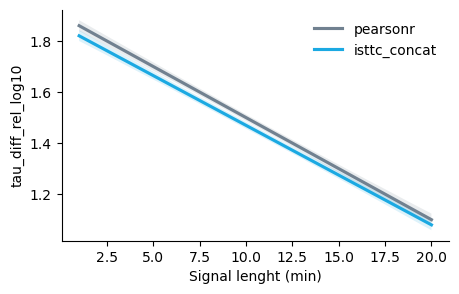

In [45]:
fig, axes = plt.subplots(1,1, figsize=(5, 3), sharey=False)

sns.regplot(x='length', y='tau_diff_rel_log10', data = tau_plot_long_df.query('method == "acf_full" and length < 30').copy(),
            scatter=None, ax=axes, label='pearsonr', color=color_acf_full)
sns.regplot(x='length', y='tau_diff_rel_log10', data = tau_plot_long_df.query('method == "sttc_full" and length < 30').copy(),
            scatter=None, ax=axes, label='isttc_concat', color=color_isttc_full)

axes.legend(frameon=False)
axes.set_xlabel('Signal lenght (min)')

# for ax in axes.flat:
#     ax.set_ylabel('Log10 diff(IT, \nground truth) (ms)')

sns.despine()

In [47]:
tau_plot_long_df

,unit_id,tau,fit_r_squared,decline_150_250,method,length,tau_ms,ecephys_structure_acronym,fr_hz_spont_30min,lv,tau_diff_rel,tau_diff_rel_log10,log_tau_ms
0,950913540,1.948056,8.352301e-01,False,acf_full,1,97.402816,VISam,6.038333,1.239003,235.687422,2.372336,1.988572
1,950915005,0.036401,-6.733747e-11,True,acf_full,1,1.820072,VISam,4.030556,0.628989,6.433969,0.808479,0.260089
2,950915018,0.029923,-6.973788e-10,False,acf_full,1,1.496165,VISam,1.903333,0.557600,20.095466,1.303098,0.174979
3,950913798,0.041470,-9.580556e-10,False,acf_full,1,2.073511,VISam,1.045556,0.683688,87.141918,1.940227,0.316706
4,950915049,0.090244,3.452054e-01,False,acf_full,1,4.512213,VISam,0.953889,1.125211,260.305505,2.415483,0.654390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56735,951190507,25.842468,7.966965e-01,True,sttc_full,30,1292.123381,VISrl,2.644444,0.795264,0.000000,-inf,3.111304
56736,951190510,0.036996,-4.374809e-10,False,sttc_full,30,1.849803,VISrl,0.751667,0.972755,0.000000,-inf,0.267125
56737,951190529,0.039777,-3.636980e-11,True,sttc_full,30,1.988856,VISrl,5.059444,0.550662,0.000000,-inf,0.298603
56738,951190848,3.186280,8.300671e-01,True,sttc_full,30,159.313998,VISrl,0.303889,1.474969,0.000000,-inf,2.202254


In [54]:
# intervals for error plots
intervals = {
    '+-100':   (0,   100),
    '+-75':  (0,  75),
    '+-50':  (0,  50),
    '+-25':  (0,  25),
}

tau_3methods_df = tau_plot_long_df.query('length < 30')[['unit_id', 'method', 'length', 'tau_ms', 
       'tau_diff_rel', 'tau_diff_rel_log10']].copy()
tau_3methods_df.reset_index(inplace=True, drop=True)

df = tau_3methods_df.copy()
rows = []
for method, sub in df.groupby(by=['method','length']):
    total = len(sub)
    row = {'method': method}
    for name, (lo, hi) in intervals.items():
        cnt = sub['tau_diff_rel'].between(lo, hi).sum()
        row[name] = cnt/total*100
    rows.append(row)
tau_3methods_error_df = pd.DataFrame(rows).set_index('method')

# make long df
tau_3methods_error_df = tau_3methods_error_df.reset_index()
tau_3methods_error_long_df = tau_3methods_error_df.melt(
    id_vars='method',
    var_name='interval',
    value_name='percentage'
)

tau_3methods_error_long_df[['method','length']] = pd.DataFrame(
    tau_3methods_error_long_df['method'].tolist(),
    index=tau_3methods_error_long_df.index
)
tau_3methods_error_long_df = tau_3methods_error_long_df.rename(columns={'interval':'error_interval'})
tau_3methods_error_long_df = tau_3methods_error_long_df[['method','length','error_interval','percentage']]

In [65]:
# prep for heatmaps
# ACF
pearsonr_trial_avg = tau_3methods_error_long_df[
    tau_3methods_error_long_df['method']=='acf_full'
]
pearsonr_trial_avg_pivot = pearsonr_trial_avg.pivot(
    index='length',
    columns='error_interval',
    values='percentage'
)

# ISTTC
sttc_trial_concat = tau_3methods_error_long_df[
    tau_3methods_error_long_df['method']=='sttc_full'
]
sttc_trial_concat_pivot = sttc_trial_concat.pivot(
    index='length',
    columns='error_interval',
    values='percentage'
)

diff_pivot_pearsonr_concat = pearsonr_trial_avg_pivot - sttc_trial_concat_pivot 

In [67]:
sttc_trial_concat_pivot

error_interval,+-100,+-25,+-50,+-75
length,,,,
1,80.014099,24.762073,43.285160,55.956997
5,87.275291,42.245330,64.892492,75.502291
10,91.099753,54.811421,74.779697,82.904477
20,94.659852,72.329926,86.305957,90.571026


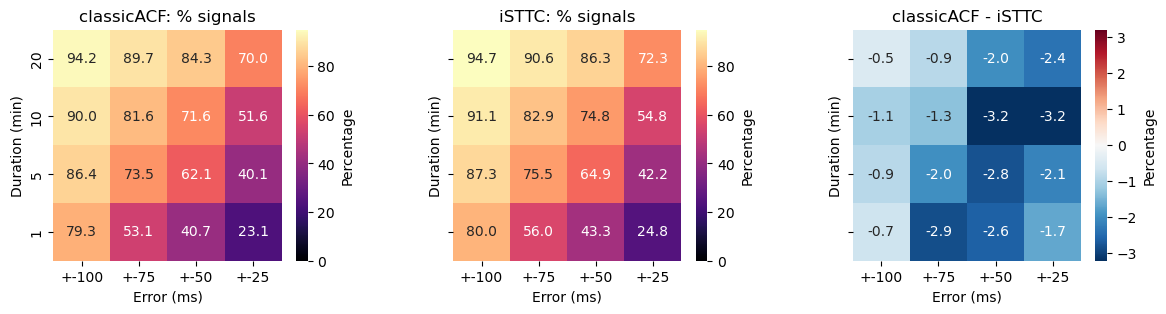

In [74]:
col_order = ['+-100', '+-75', '+-50', '+-25']

row_order = sorted(diff_pivot_pearsonr_concat.index, reverse=True)

pearsonr_trial_avg_ordered  = pearsonr_trial_avg_pivot.reindex(index=row_order, columns=col_order)
sttc_trial_concat_ordered  = sttc_trial_concat_pivot.reindex(index=row_order, columns=col_order)
diff_pivot_pearsonr_concat_pivot_ordered  = diff_pivot_pearsonr_concat.reindex(index=row_order, columns=col_order)

# plot ACF heatmap
fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

diff_limit = np.max([np.abs(diff_pivot_pearsonr_concat_pivot_ordered.min().min()), 
                     np.abs(diff_pivot_pearsonr_concat_pivot_ordered.max().max())])

norm = TwoSlopeNorm(vcenter=0, vmin=-diff_limit, vmax=diff_limit)
#norm = TwoSlopeNorm(vcenter=0)

sns.heatmap(
    pearsonr_trial_avg_ordered,
    cmap="magma", vmin=0, vmax=95,
    cbar_kws={'label': 'Percentage'}, 
    annot=True, fmt=".1f",
    ax=axes[0]
)
axes[0].set_title("classicACF: % signals")

sns.heatmap(
    sttc_trial_concat_ordered,
    cmap="magma", vmin=0, vmax=95,
    cbar_kws={'label': 'Percentage'}, 
    annot=True, fmt=".1f",
    ax=axes[1]
)
axes[1].set_title('iSTTC: % signals')

sns.heatmap(
    diff_pivot_pearsonr_concat_pivot_ordered,
    cmap="RdBu_r", 
    norm=norm,
    cbar_kws={'label': 'Percentage'}, 
    annot=True, fmt=".1f",
    ax=axes[2]
)
axes[2].set_title('classicACF - iSTTC')

for ax in axes.flat:
    ax.set_xlabel('Error (ms)')
    ax.set_ylabel('Duration (min)')

save_fig = True
if save_fig:
    plt.savefig(fig_folder + 'taus_duration_var_p_vs_concat_parametric_heatmaps.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_duration_var_p_vs_concat_parametric_heatmaps.svg' , bbox_inches='tight')